# Algorithmic Toolbox - Week 2 - Algorithmic Warm Up

## 1. Fibonacci Number

In [1]:
%%writefile first.cpp
#include <bits/stdc++.h>

using namespace std;

long long f[46];

int fibonacci_naive(int n) {
    if (n <= 1) {
        return n;
    }
    return fibonacci_naive(n - 1) + fibonacci_naive(n - 2);
}

long long fibonacci_fast(int n) {
    for (int i = 2; i <= n; i++) {
        f[i] = f[i - 1] + f[i - 2];
    }
    return f[n];
}

int main() {
    f[0] = 0; f[1] = 1;
    int n = 0; cin >> n;
    cout << fibonacci_fast(n) << '\n';
    return 0;
}

Writing first.cpp


In [2]:
!g++ first.cpp -o first
!./first

10
55


## 2. Last Digit of a Large Fibonacci Number

In [3]:
%%writefile second.cpp
#include <bits/stdc++.h>

using namespace std;

const int size = (int) 1e7 + 1;
int f[size];

int get_fibonacci_last_digit_fast(int n) {
    f[0] = 0; f[1] = 1;
    for (int i = 2; i <= n; i++) {
        f[i] = (f[i - 1] + f[i - 2]) % 10;
    }
    return f[n];
}

int get_fibonacci_last_digit_naive(int n) {
    if (n <= 1)
        return n;
    int previous = 0;
    int current  = 1;
    for (int i = 0; i < n - 1; i++) {
        int tmp_previous = previous;
        previous = current;
        current = tmp_previous + current;
    }
    return current % 10;
}

int main() {
    int n; cin >> n;
    int c = get_fibonacci_last_digit_fast(n);
    cout << c << '\n';
}

Writing second.cpp


In [4]:
!g++ second.cpp -o second
!./second

331
9


## 3. Greatest Common Divisor

In [5]:
%%writefile third.cpp
#include <bits/stdc++.h>

using namespace std;

int gcd_fast(int a, int b) {
    if (b > a)
        swap(a, b);
    if (b == 0)
        return a;
    return gcd_fast(b, a % b);
}

int gcd_naive(int a, int b) {
    int current_gcd = 1;
    for (int d = 2; d <= a && d <= b; d++) {
        if (a % d == 0 && b % d == 0) {
            if (d > current_gcd) {
                current_gcd = d;
            }
        }
    }
    return current_gcd;
}

int main() {
    int a, b;
    cin >> a >> b;
    cout << gcd_fast(a, b) << "\n";
    return 0;
}

Writing third.cpp


In [6]:
!g++ third.cpp -o third
!./third

28851538 1183019
17657


## 4. Least Common Multiple

In [7]:
%%writefile fourth.cpp
#include <bits/stdc++.h>

using namespace std;

int gcd_fast(int a, int b) {
    if (b > a)
        swap(a, b);
    if (b == 0)
        return a;
    return gcd_fast(b, a % b);
}

long long lcm_naive(int a, int b) {
    for (long l = 1; l <= (long long) a * b; ++l)
        if (l % a == 0 && l % b == 0)
            return l;
    return (long long) a * b;
}

long long lcm_fast(int a, int b) {
    return (long long) a * b / gcd_fast(a, b);
}

int main() {
    int a, b;
    cin >> a >> b;
    cout << lcm_fast(a, b) << "\n";
    return 0;
}

Writing fourth.cpp


In [8]:
!g++ fourth.cpp -o fourth
!./fourth

761457 614573
467970912861


## 5. Fibonacci Number Again

In [9]:
%%writefile fifth.cpp
#include <bits/stdc++.h>

using namespace std;

int fibonacci(long long n, long long m) {
    int f[n + 1];
    f[0] = 0;
    f[1] = 1;
    for (int i = 2; i <= n; i++) {
        f[i] = (f[i - 1] + f[i - 2]) % m;
    }
    return f[n];
}

long long get_fibonacci_huge_fast(long long n, long long m) {
    if (n <= 1)
        return n;
    int p = 0;
    vector<int> period;
    period.push_back(0);
    period.push_back(1);
    for (int i = 2; i < m * m; i++) {
        if (fibonacci(i, m) == 0 && fibonacci(i + 1, m) == 1) {
            p = i;
            break;
        }
        period.push_back(fibonacci(i, m));
    }
    long long pos = n % p;
    return period[pos];
}

long long get_fibonacci_huge_naive(long long n, long long m) {
    if (n <= 1)
        return n;
    long long previous = 0;
    long long current  = 1;
    for (long long i = 0; i < n - 1; ++i) {
        long long tmp_previous = previous;
        previous = current;
        current = tmp_previous + current;
    }
    return current % m;
}

int main() {
    long long n, m;
    cin >> n >> m;
    cout << get_fibonacci_huge_fast(n, m) << '\n';
    return 0;
}

Writing fifth.cpp


In [10]:
!g++ fifth.cpp -o fifth
!./fifth

2816213588 239
151


## 6. Last Digit of the Sum of Fibonacci Numbers

In [11]:
%%writefile sixth.cpp
#include <bits/stdc++.h>

using namespace std;

int fibonacci(long long n, long long m) {
    int f[n + 1];
    f[0] = 0;
    f[1] = 1;
    for (int i = 2; i <= n; i++) {
        f[i] = (f[i - 1] + f[i - 2]) % m;
    }
    return f[n];
}

long long get_fibonacci_huge_fast(long long n, long long m) {
    if (n <= 1)
        return n;
    int p = 0;
    vector<int> period;
    period.push_back(0);
    period.push_back(1);
    for (int i = 2; i < m * m; i++) {
        if (fibonacci(i, m) == 0 && fibonacci(i + 1, m) == 1) {
            p = i;
            break;
        }
        period.push_back(fibonacci(i, m));
    }
    long long pos = n % p;
    return period[pos];
}

int fibonacci_sum_fast(long long n) {
    if (n <= 1)
        return n;
    return (get_fibonacci_huge_fast(n + 2, 10) - 1 + 10) % 10;
}

int fibonacci_sum_naive(long long n) {
    if (n <= 1)
        return n;
    long long previous = 0;
    long long current = 1;
    long long sum = 1;
    for (long long i = 0; i < n - 1; ++i) {
        long long tmp_previous = previous;
        previous = current;
        current = tmp_previous + current;
        sum += current;
    }
    return sum % 10;
}

int main() {
    long long n = 0;
    cin >> n;
    cout << fibonacci_sum_fast(n) << "\n";
    return 0;
}

Writing sixth.cpp


In [12]:
!g++ sixth.cpp -o sixth
!./sixth

100
5


## 7. Last Digit of the Sum of Fibonacci Numbers Again

In [13]:
%%writefile seventh.cpp
#include <bits/stdc++.h>

using namespace std;

int fibonacci(long long n, long long m) {
    int f[n + 1];
    f[0] = 0;
    f[1] = 1;
    for (int i = 2; i <= n; i++) {
        f[i] = (f[i - 1] + f[i - 2]) % m;
    }
    return f[n];
}

long long get_fibonacci_huge_fast(long long n, long long m) {
    if (n <= 1)
        return n;
    int p = 0;
    vector<int> period;
    period.push_back(0);
    period.push_back(1);
    for (int i = 2; i < m * m; i++) {
        if (fibonacci(i, m) == 0 && fibonacci(i + 1, m) == 1) {
            p = i;
            break;
        }
        period.push_back(fibonacci(i, m));
    }
    long long pos = n % p;
    return period[pos];
}

int fibonacci_sum_fast(long long n) {
    if (n <= 0)
        return 0;
    if (n <= 1)
        return n;
    return (get_fibonacci_huge_fast(n + 2, 10) - 1 + 10) % 10;
}

long long get_fibonacci_partial_sum_fast(long long from, long long to) {
    return (fibonacci_sum_fast(to) - fibonacci_sum_fast(from - 1) + 10) % 10;
}

long long get_fibonacci_partial_sum_naive(long long from, long long to) {
    long long sum = 0;
    long long current = 0;
    long long next  = 1;
    for (long long i = 0; i <= to; ++i) {
        if (i >= from) {
            sum += current;
        }
        long long new_current = next;
        next = next + current;
        current = new_current;
    }
    return sum % 10;
}

int main() {
    long long from, to;
    cin >> from >> to;
    cout << get_fibonacci_partial_sum_fast(from, to) << '\n';
    return 0;
}

Writing seventh.cpp


In [14]:
!g++ seventh.cpp -o seventh
!./seventh

10 200
2


## 8. Last Digit of the Sum of Squares of Fibonacci Numbers

In [15]:
%%writefile eighth.cpp
#include <bits/stdc++.h>

using namespace std;

int fibonacci(long long n, long long m) {
    int f[n + 1];
    f[0] = 0;
    f[1] = 1;
    for (int i = 2; i <= n; i++) {
        f[i] = (f[i - 1] + f[i - 2]) % m;
    }
    return f[n];
}

long long get_fibonacci_huge_fast(long long n, long long m) {
    if (n <= 1)
        return n;
    int p = 0;
    vector<int> period;
    period.push_back(0);
    period.push_back(1);
    for (int i = 2; i < m * m; i++) {
        if (fibonacci(i, m) == 0 && fibonacci(i + 1, m) == 1) {
            p = i;
            break;
        }
        period.push_back(fibonacci(i, m));
    }
    long long pos = n % p;
    return period[pos];
}

int fibonacci_sum_squares_fast(long long n) {
    return (get_fibonacci_huge_fast(n, 10) * get_fibonacci_huge_fast(n + 1, 10)) % 10;
}

int fibonacci_sum_squares_naive(long long n) {
    if (n <= 1)
        return n;
    long long previous = 0;
    long long current = 1;
    long long sum = 1;
    for (long long i = 0; i < n - 1; ++i) {
        long long tmp_previous = previous;
        previous = current;
        current = tmp_previous + current;
        sum += current * current;
    }
    return sum % 10;
}

int main() {
    long long n = 0;
    cin >> n;
    cout << fibonacci_sum_squares_fast(n) << "\n";
    return 0;
}

Writing eighth.cpp


In [16]:
!g++ eighth.cpp -o eighth
!./eighth

1234567890
0


## Veredict
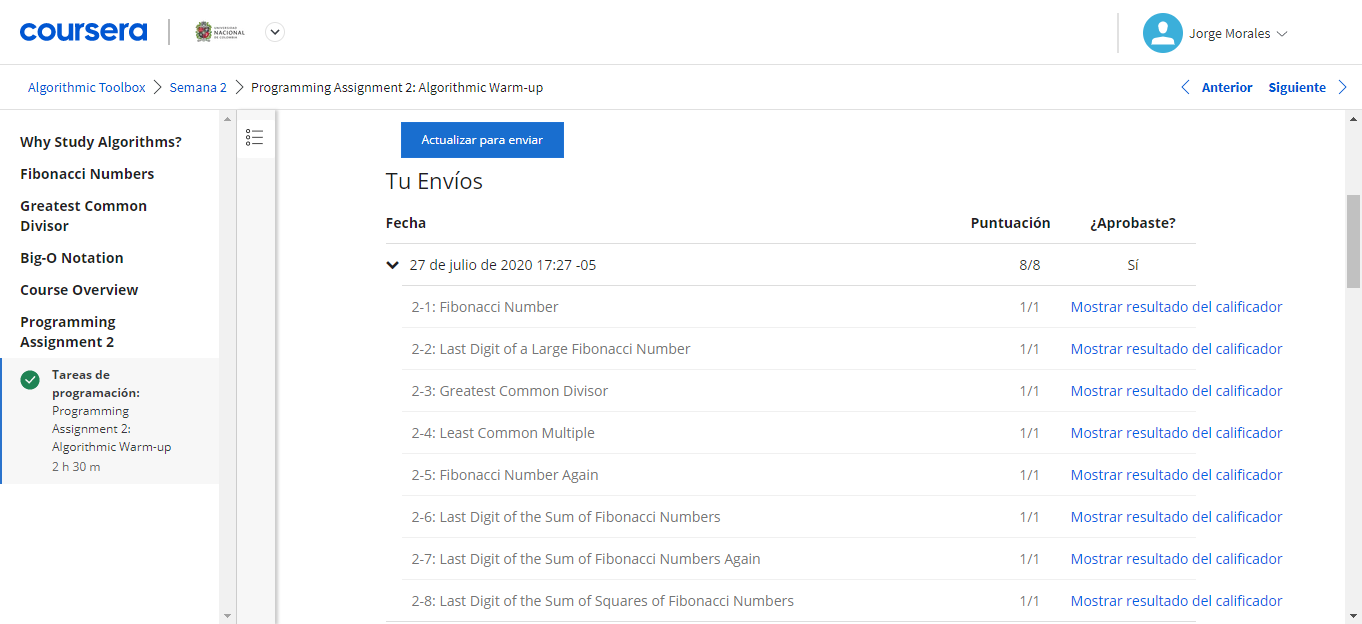